In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
df = pd.read_csv("drive/My Drive/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Shape of the dataset
df.shape

(10000, 14)

In [ ]:
# Info on the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Checking missing information
def checkNull(column):
  null = len(df[df[column].isnull()])
  return null

# Checking columns with the object datatype and their unique values
def checkObject(column):
  dtype = df[column].dtype
  if dtype == 'object':
    uniqueVal = len(df[column].unique())
    print("Column: ", column, "\nUnique values: ", uniqueVal)

columns = df.columns
for i in columns:
  nullValues = checkNull(i)
  print("Column: ", i, " \nMissing values: ", nullValues)

Column:  RowNumber  
Missing values:  0
Column:  CustomerId  
Missing values:  0
Column:  Surname  
Missing values:  0
Column:  CreditScore  
Missing values:  0
Column:  Geography  
Missing values:  0
Column:  Gender  
Missing values:  0
Column:  Age  
Missing values:  0
Column:  Tenure  
Missing values:  0
Column:  Balance  
Missing values:  0
Column:  NumOfProducts  
Missing values:  0
Column:  HasCrCard  
Missing values:  0
Column:  IsActiveMember  
Missing values:  0
Column:  EstimatedSalary  
Missing values:  0
Column:  Exited  
Missing values:  0


There are no missing values in our dataset

In [ ]:
# Checking for columns with text inputs
columns = df.columns
for i in columns:
  checkObject(i)

Column:  Surname 
Unique values:  2932
Column:  Geography 
Unique values:  3
Column:  Gender 
Unique values:  2


In [ ]:
# Encoding the gender column using label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
# Statistical distribution of the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


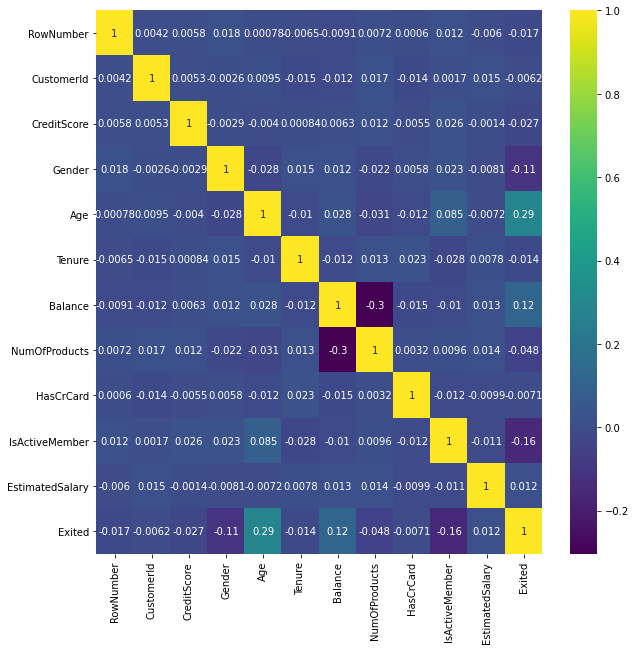

In [ ]:
# Checking the correlation of the all features
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation.T, annot=True, cmap='viridis')

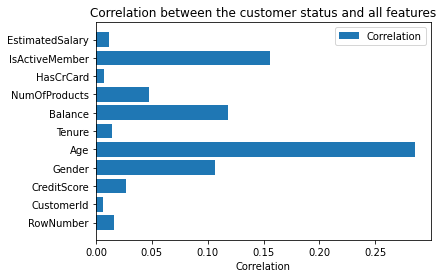

In [ ]:
# Assessing how other columns relate with the label
labelCorr = abs(correlation["Exited"])
labelCorr = labelCorr.drop(["Exited"])
plt.title("Correlation between the customer status and all features")
plt.barh(labelCorr.index, labelCorr, label="Correlation")
plt.xlabel("Correlation")
plt.legend()

In [ ]:
# Analyzing the ratio of churn customers on the active one
churn = df["Exited"]
notChurn = len(df[churn == 0])
isChurn = len(df[churn == 1])
ratio1 = notChurn / len(churn)*100
ratio2 = isChurn/len(churn)*100
print("Over ", ratio1, "% of customers observed in our dataset did not exit, while ", ratio2, "% exited")

Over  79.63 % of customers observed in our dataset did not exit, while  20.369999999999997 % exited


In [ ]:
# Distribution of churned customers based on their gender
df.groupby("Gender")[['Exited']].mean()

,Exited
Gender,
0,0.250715
1,0.164559


In [ ]:
# Removing unecessary columns from the dataset
df = df.drop(['Surname', 'Geography', 'RowNumber', 'CustomerId'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Splitting data into training and testing
data = df.drop(["Exited"], axis=1)
target = df["Exited"]
data.shape, target.shape

((10000, 9), (10000,))

In [ ]:
# Splitting data and target into training and testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 9), (2000, 9), (8000,), (2000,))

In [ ]:
# Training the model and predicting
model = LogisticRegression()
y_pred = model.fit(X_train, y_train).predict(X_test)

In [ ]:
# Checking the accuracy score
score = accuracy_score(y_test, y_pred)*100
print("The accuracy of the xgb model is: ", score)

The accuracy of the xgb model is:  80.05


In [ ]:
# Checking the predicted values via the confusion matrix
conf_matrix = confusion_matrix(y_pred, y_test)
conf_matrix

array([[1573,  365],
       [  34,   28]])

In [ ]:
# Creating a function that takes user input and classify the status of the user
def user_input():
    creditScore = int(input("Credit Score: "))
    Gender = int(input("\nPress 0 if the user is a female or 1 if male: "))
    age = int(input("\nAge: "))
    tenure = int(input("\nTenure: "))
    balance = float(input("\nBank Balance: "))
    products = int(input("\nNumber of products: "))
    hasCrCard = int(input("\nPress 1 if the user has a credit card or 0 otherwise: "))
    isMember = int(input("\nPress 1 if the user is an active member or 0 otherwise: "))
    salary = float(input("\nEstimated salary: "))
    
    X_user = np.array([creditScore, Gender, age, tenure, balance, products, hasCrCard, isMember, salary])
    y_pred = model.predict([X_user])
    if y_pred == 0:
        print("\nClient is not exiting the bank")
    elif y_pred == 1:
        print("\nClient is on the threshold of exiting the bank Consider taking further steps to incentivise the client")

In [ ]:
user_input()

Credit Score: 632

Press 0 if the user is a female or 1 if male: 1

Age: 42

Tenure: 4

Bank Balance: 119624

Number of products: 2

Press 1 if the user has a credit card or 0 otherwise: 1

Press 1 if the user is an active member or 0 otherwise: 1

Estimated salary: 195978.86

Client is not exiting the bank
